In [1]:
import pandas as pd
import numpy as np
import pickle
import math

import utils
import metrics_and_plotting

### Note on XGBoost
In order to generate the full results, you need to make sure you have a valid install of xgboost in this environment. Sometimes, that involves messing around with libomp, and can be a little painful. Best of luck!

### Load Data
Load the scenario that you are generating results for.

In [2]:
scenario = "ACSEmployment" #ACSMobility, ACSPublicCoverage
pd_all_data, pd_features, pd_target, pd_group =  utils.get_scenario(scenario)

['AGEP', 'SCHL', 'RELP']


### Load metrics
Load the metrics for each run here.

Then, you can immediately plot them with the box and whiskers utility function!

In [5]:
with open("employment_results_metrics/employment_balanced_metrics_7.pickle", "rb") as output_file:
    employment_balanced_metrics_7 = pickle.load(output_file)
with open("employment_results_metrics/employment_fnr_metrics_7.pickle", "rb") as output_file:
    employment_fnr_metrics_7 = pickle.load(output_file)
with open("employment_results_metrics/employment_sq_metrics_7.pickle", "rb") as output_file:
    employment_sq_metrics_eps_7 = pickle.load(output_file)
with open("employment_results_metrics/employment_mst_metrics_7.pickle", "rb") as output_file:
    employment_mst_metrics_7 = pickle.load(output_file)

#### Ease of box plot generation
You can swap in a tuple `(name, metric_dataframe)` to plot all the metrics in box plots for comparison.

[('MST',   CSTest KSTestExtended LogisticDetection SVCDetection BNLikelihood  \
0   None           None              None         None         None   
1   None           None              None         None         None   
2   None           None              None         None         None   
3   None           None              None         None         None   
4   None           None              None         None         None   
5   None           None              None         None         None   
6   None           None              None         None         None   
7   None           None              None         None         None   
8   None           None              None         None         None   
9   None           None              None         None         None   

   real_model_score  fake_model_score  real_f1_score_filtered  \
0          0.760338          0.708107                0.759140   
1          0.760201          0.711616                0.757287   
2          0.7

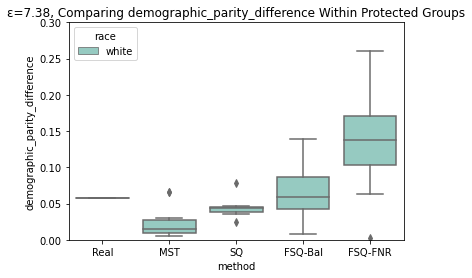

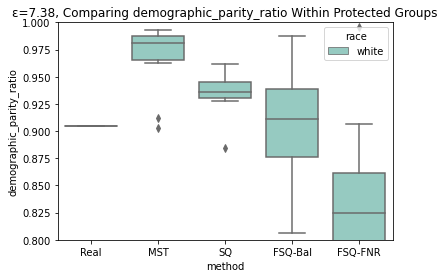

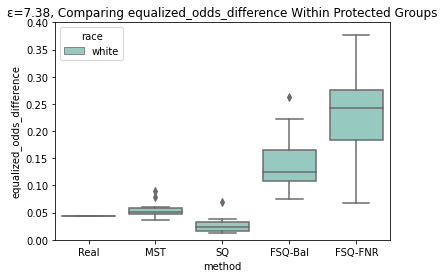

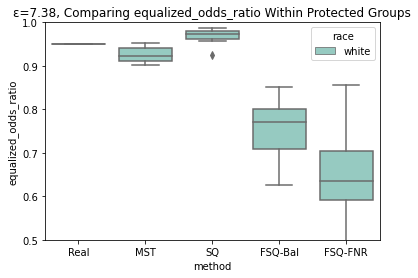

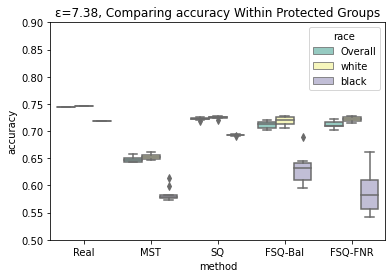

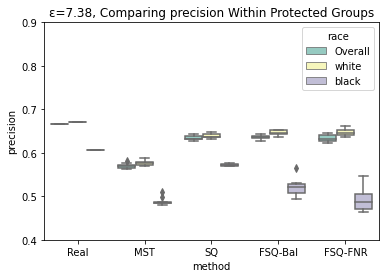

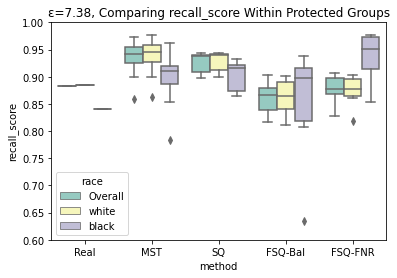

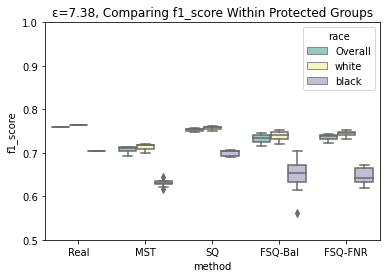

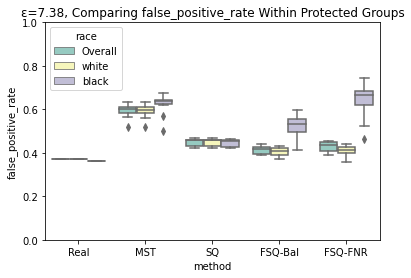

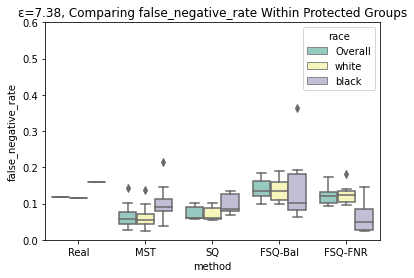

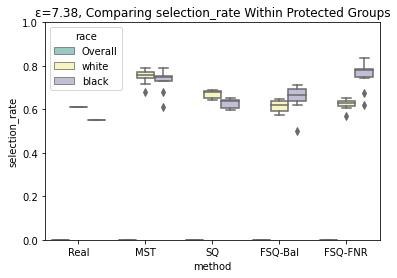

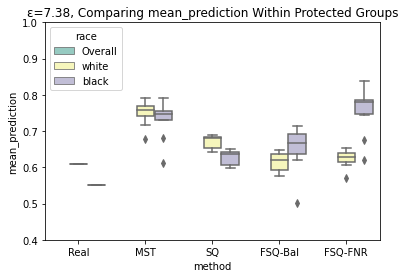

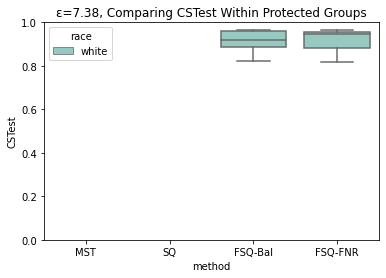

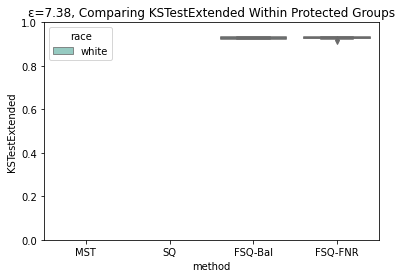

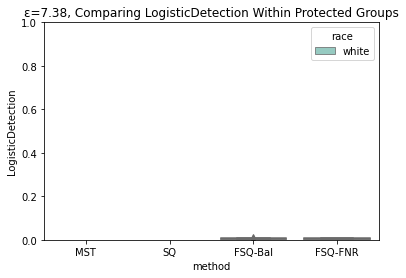

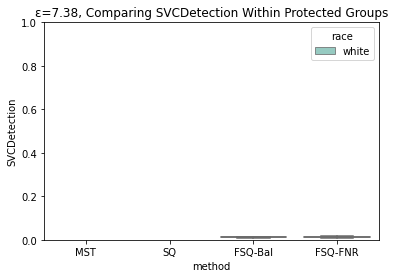

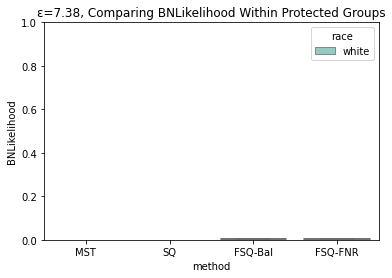

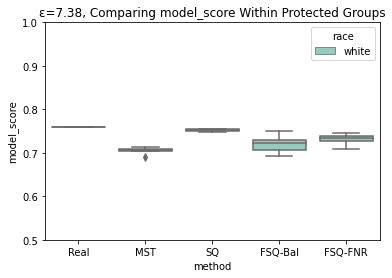

In [7]:
list_for_box_plot = [
    ("MST", pd.DataFrame.from_dict(metrics_and_plotting.process_list_results(employment_mst_metrics_7))),
    ("SQ", pd.DataFrame.from_dict(metrics_and_plotting.process_list_results(employment_sq_metrics_eps_7))),
    ("FSQ-Bal", pd.DataFrame.from_dict(metrics_and_plotting.process_list_results(employment_balanced_metrics_7))),
    ("FSQ-FNR", pd.DataFrame.from_dict(metrics_and_plotting.process_list_results(employment_fnr_metrics_7))),
]
metrics_and_plotting.generate_all_box_and_whisker(list_for_box_plot, metrics_and_plotting.dict_all_types_metrics, epsilon=7.38)